In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [36]:
df = pd.read_hdf("train.hdf5")
df_test = pd.read_hdf("validation.hdf5")

In [37]:
#Normalize
data = df
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

data_test = df_test
scaler = StandardScaler()
np_scaled1 = scaler.fit_transform(data_test)
data_test = pd.DataFrame(np_scaled1)

In [38]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,61430,61431,61432,61433,61434,61435,61436,61437,61438,61439
0,0.047464,0.053532,0.026404,0.001485,-0.006982,-0.013295,-0.030261,-0.041558,-0.027387,-0.002181,...,0.015073,-0.026181,-0.024283,0.078415,0.084045,0.025042,0.047675,0.106836,0.061541,0.020093
1,-0.238953,-0.312832,-0.326963,-0.272776,-0.203775,-0.136417,-0.079174,-0.032032,0.102320,0.283913,...,0.250024,-0.022559,-0.312766,-0.712200,-0.908712,-0.998595,-0.987300,-1.021430,-1.028615,-0.811661
2,0.243154,0.189545,0.146085,-0.008934,-0.079109,-0.081969,-0.222021,-0.197699,-0.009480,-0.102797,...,0.021461,0.399766,0.828129,1.092827,1.114313,1.230101,1.517894,1.554933,1.040577,0.459358
3,-0.174549,-0.148717,-0.261345,-0.323375,-0.355961,-0.393669,-0.180705,0.017705,0.021747,0.138502,...,-0.319589,-0.207948,-0.064995,-0.023089,0.067808,0.183789,-0.003459,-0.218882,-0.098940,0.063875
4,-1.157205,-1.092328,-0.788963,-0.509326,-0.387908,-0.213203,0.131020,0.453823,0.785290,1.032255,...,1.029430,1.243811,0.993970,0.545930,0.145420,-0.265790,-0.730155,-1.115780,-1.176935,-0.881167


In [39]:
data.shape

(1677, 61440)

plotting normal data 

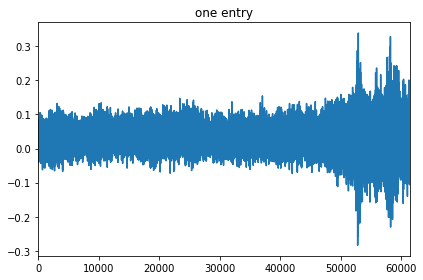

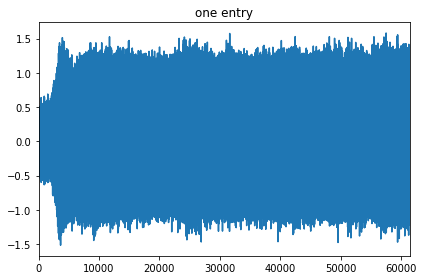

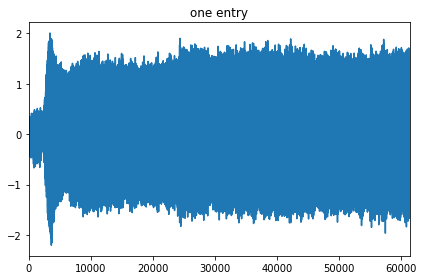

In [40]:
data.loc[0].plot(title='one entry') 
plt.tight_layout()
plt.show()   

data.loc[1].plot(title='one entry') 
plt.tight_layout()
plt.show()

data.loc[2].plot(title='one entry') 
plt.tight_layout()
plt.show()

plotting anomalous data

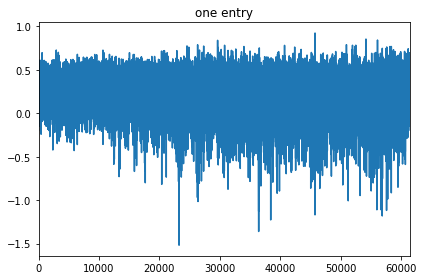

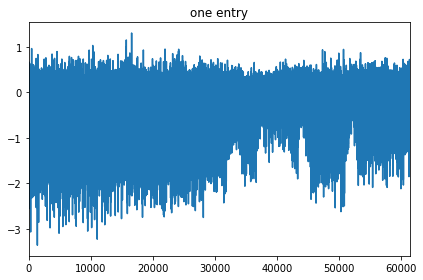

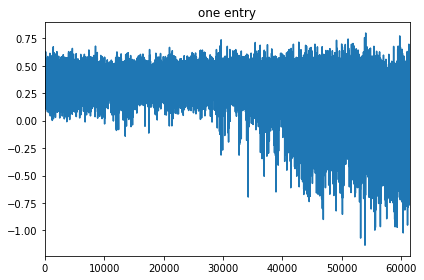

In [41]:

data_test.loc[1].plot(title='one entry') 
plt.tight_layout()
plt.show()

data_test.loc[4].plot(title='one entry') 
plt.tight_layout()
plt.show()

data_test.loc[5].plot(title='one entry') 
plt.tight_layout()
plt.show()

#### Downsampling our data, and analysing if it preserves the structure

In [9]:
61440/60

1024.0

In [10]:
col_names = [i for i in range(1024)]

In [11]:
new_df = pd.DataFrame(np.nan,index=[i for i in range(1677)], columns=col_names)

In [12]:
counter = 0

addition_number = 60
new_total_column_number = 1024
for row in range(len(df)):
    
    start_point = 0
    finish_point = 60
    
    for sub_col in range(new_total_column_number):
        
        assigned_value = np.average(data.iloc[row][start_point:finish_point].values)
        new_df.iloc[row][sub_col] = assigned_value
        start_point = start_point + addition_number
        finish_point = finish_point + addition_number
        
    counter = counter + 1
    if counter%100 == 0:
        print("100 row finished")

100 row finished
100 row finished
100 row finished
100 row finished
100 row finished
100 row finished
100 row finished
100 row finished
100 row finished
100 row finished
100 row finished
100 row finished
100 row finished
100 row finished
100 row finished
100 row finished


In [13]:
new_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
1672,0.067392,0.009974,-0.130084,0.070860,-0.008283,0.007682,-0.034064,-0.035847,-0.171621,-0.026179,...,0.041691,-0.067689,-0.011956,-0.018252,-0.025062,-0.023444,-0.028135,-0.056518,-0.007805,0.041876
1673,-0.023744,-0.091571,-0.183753,-0.137961,-0.073136,-0.086668,-0.142259,-0.169764,-0.221724,-0.157916,...,-0.038964,-0.022716,0.021515,-0.000505,-0.017461,-0.035646,-0.033880,0.017899,-0.006895,-0.015271
1674,0.077371,-0.026922,-0.089953,-0.029196,0.039428,-0.031869,-0.012090,-0.073503,-0.072951,-0.029844,...,-0.037135,-0.053707,-0.017177,-0.020640,-0.017007,-0.104350,-0.043465,0.031854,-0.069898,-0.032612
1675,0.011814,-0.070670,-0.043869,-0.082339,-0.007362,-0.049701,-0.033962,-0.102460,-0.043421,-0.067685,...,-0.048372,-0.032062,-0.047547,-0.024280,-0.040194,-0.062784,-0.035781,-0.031024,-0.031725,-0.049977
1676,0.055507,0.051492,0.059261,0.055316,0.060305,0.061806,0.054582,0.053186,0.054798,0.056915,...,0.084833,0.083459,0.082049,0.084079,0.083975,0.083692,0.080598,0.086233,0.085641,0.081993


In [14]:
new_df.to_hdf('data_LSTM_train.h5', key='df', mode='w')

In [15]:
new_df_test = pd.DataFrame(np.nan,index=[i for i in range(594)], columns=col_names)

In [16]:
counter = 0

addition_number = 60
new_total_column_number = 1024
for row in range(len(df_test)):
    
    start_point = 0
    finish_point = 60
    
    for sub_col in range(new_total_column_number):
        
        assigned_value = np.average(data_test.iloc[row][start_point:finish_point].values)
        new_df_test.iloc[row][sub_col] = assigned_value
        start_point = start_point + addition_number
        finish_point = finish_point + addition_number
        
    counter = counter + 1
    if counter%100 == 0:
        print("100 row finished")

100 row finished
100 row finished
100 row finished
100 row finished
100 row finished


In [17]:
new_df_test.to_hdf('data_LSTM_test.h5', key='df', mode='w')

In [18]:
new_df_test.tail()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
589,-1.783892,-1.781074,-1.780800,-1.789059,-1.780538,-1.783090,-1.780466,-1.777790,-1.775957,-1.774843,...,-1.888664,-1.889776,-1.889224,-1.894732,-1.892992,-1.890533,-1.888012,-1.884926,-1.888975,-1.889478
590,-1.191050,-1.187984,-1.187802,-1.194480,-1.188165,-1.192458,-1.190529,-1.188115,-1.188770,-1.189893,...,-1.158303,-1.159689,-1.158883,-1.163082,-1.162435,-1.159487,-1.157673,-1.155468,-1.158539,-1.158946
591,0.418531,0.421442,0.421538,0.415722,0.420071,0.419021,0.417414,0.417997,0.419744,0.417832,...,0.455191,0.449191,0.448876,0.440832,0.433258,0.433961,0.433765,0.433993,0.434118,0.435697
592,0.414650,0.419226,0.413913,0.410915,0.413075,0.413657,0.416566,0.411469,0.416787,0.422689,...,0.434908,0.432746,0.432910,0.434606,0.429539,0.433553,0.436008,0.432858,0.433312,0.435586
593,0.324847,0.332697,0.340079,0.334391,0.336447,0.339346,0.339399,0.342170,0.347681,0.356397,...,0.355439,0.366429,0.367338,0.329910,0.341347,0.369176,0.346212,0.352804,0.360989,0.331128


#### normal data

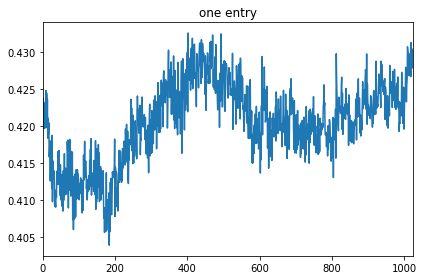

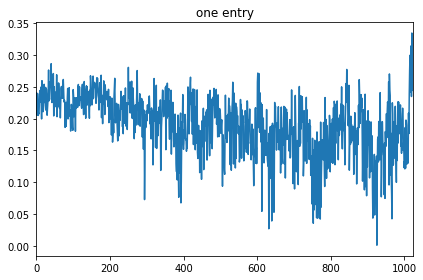

In [19]:

new_df_test.loc[0].plot(title='one entry') 
plt.tight_layout()
plt.show()

new_df_test.loc[1].plot(title='one entry') 
plt.tight_layout()
plt.show()

#### 1-2 normal data  
#### 3-4 anomalous data

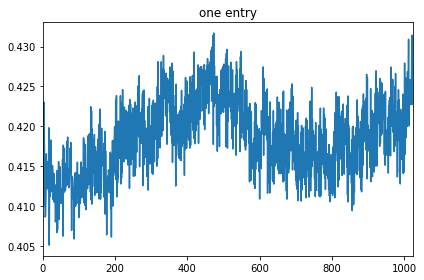

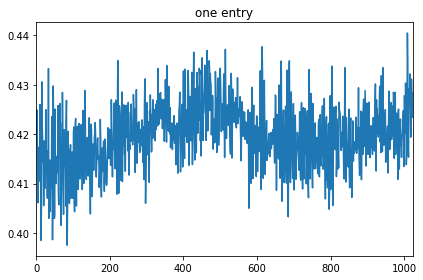

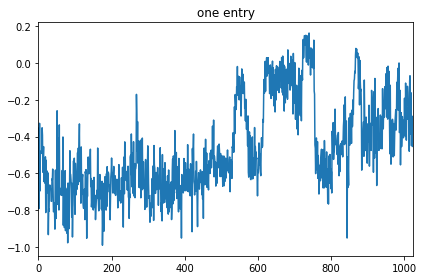

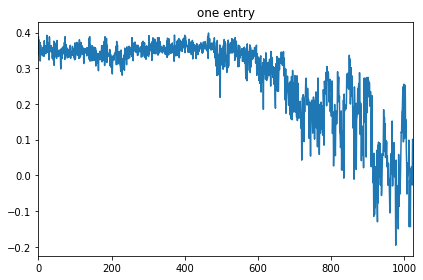

In [20]:
new_df_test.loc[2].plot(title='one entry') 
plt.tight_layout()
plt.show()

new_df_test.loc[3].plot(title='one entry') 
plt.tight_layout()
plt.show()

new_df_test.loc[4].plot(title='one entry') 
plt.tight_layout()
plt.show()

new_df_test.loc[5].plot(title='one entry') 
plt.tight_layout()
plt.show()

In [21]:
new_df.shape, new_df_test.shape

((1677, 1024), (594, 1024))

#### plotting normal data

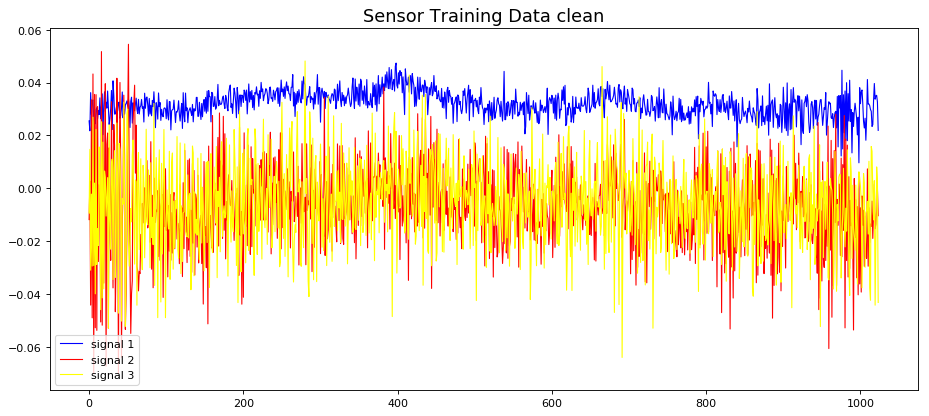

In [22]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(new_df.loc[0], label='signal 1', color='blue', animated = True, linewidth=1)
ax.plot(new_df.loc[1], label='signal 2', color='red', animated = True, linewidth=1)
#ax.plot(new_df.loc[2], label='signal 1', color='green', animated = True, linewidth=1)
ax.plot(new_df.loc[3], label='signal 3', color='yellow', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Sensor Training Data clean', fontsize=16)
plt.show()

#### plotting normal vs anomalous data

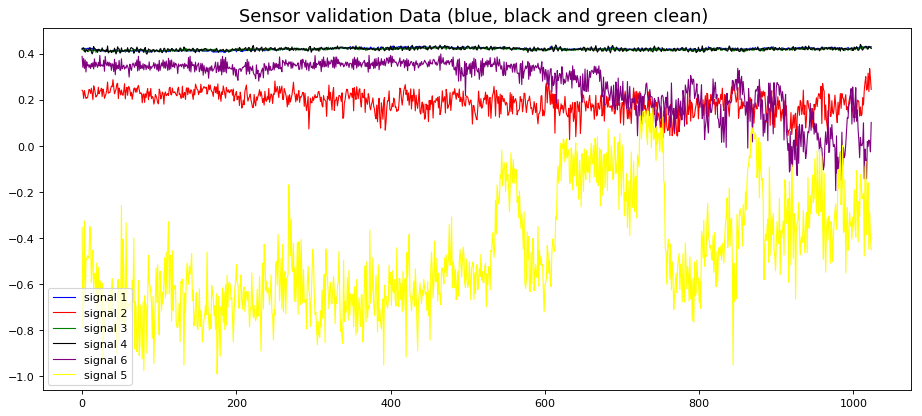

In [23]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(new_df_test.loc[0], label='signal 1', color='blue', animated = True, linewidth=1)
ax.plot(new_df_test.loc[1], label='signal 2', color='red', animated = True, linewidth=1)
ax.plot(new_df_test.loc[2], label='signal 3', color='green', animated = True, linewidth=1)
ax.plot(new_df_test.loc[3], label='signal 4', color='black', animated = True, linewidth=1)
ax.plot(new_df_test.loc[5], label='signal 6', color='purple', animated = True, linewidth=1)
ax.plot(new_df_test.loc[4], label='signal 5', color='yellow', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Sensor validation Data (blue, black and green clean) ', fontsize=16)
plt.show()

looking at it at frequency level

will be converted to numpy array, dont use .loc

In [24]:
train_fft = np.fft.fft(new_df)
test_fft = np.fft.fft(new_df_test)

In [25]:
train_fft[0].shape

(1024,)

/Users/aj/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


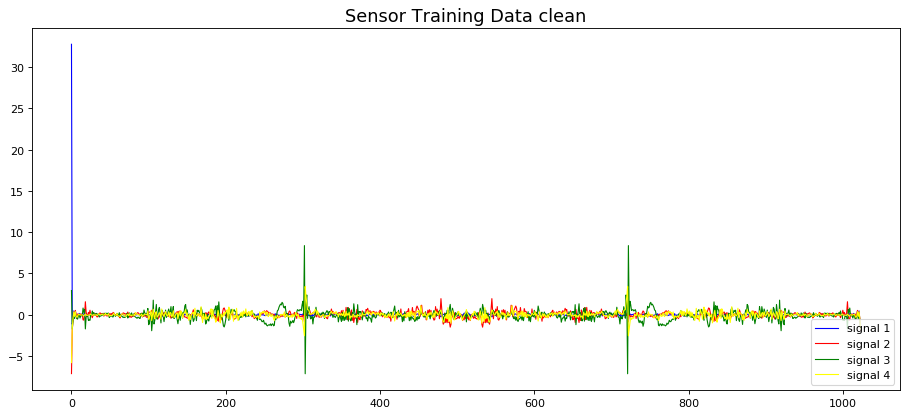

In [26]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(train_fft[0], label='signal 1', color='blue', animated = True, linewidth=1)
ax.plot(train_fft[1], label='signal 2', color='red', animated = True, linewidth=1)
ax.plot(train_fft[2], label='signal 3', color='green', animated = True, linewidth=1)
ax.plot(train_fft[3], label='signal 4', color='yellow', animated = True, linewidth=1)
plt.legend(loc='lower right')
ax.set_title('Sensor Training Data clean', fontsize=16)
plt.show()

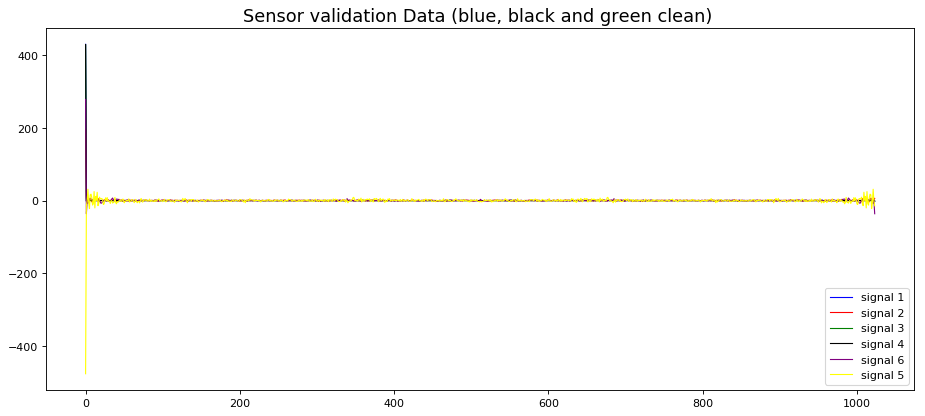

In [27]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(test_fft[0], label='signal 1', color='blue', animated = True, linewidth=1)
ax.plot(test_fft[1], label='signal 2', color='red', animated = True, linewidth=1)
ax.plot(test_fft[2], label='signal 3', color='green', animated = True, linewidth=1)
ax.plot(test_fft[3], label='signal 4', color='black', animated = True, linewidth=1)
ax.plot(test_fft[5], label='signal 6', color='purple', animated = True, linewidth=1)
ax.plot(test_fft[4], label='signal 5', color='yellow', animated = True, linewidth=1)
plt.legend(loc='lower right')
ax.set_title('Sensor validation Data (blue, black and green clean) ', fontsize=16)
plt.show()

In [28]:
new_df_test

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.419704,0.423771,0.423383,0.419687,0.422175,0.421799,0.419729,0.423200,0.419812,0.424814,...,0.428327,0.428307,0.429856,0.429813,0.426695,0.431334,0.428879,0.430478,0.427874,0.429692
1,0.240751,0.236364,0.205380,0.239626,0.220946,0.205197,0.208689,0.208003,0.226075,0.244325,...,0.239410,0.275840,0.299910,0.241651,0.246000,0.314687,0.234972,0.334943,0.293947,0.244678
2,0.422615,0.416643,0.413079,0.409927,0.423011,0.415610,0.413188,0.408644,0.408879,0.411380,...,0.424795,0.425852,0.424830,0.425801,0.424327,0.422709,0.425384,0.431418,0.426083,0.422778
3,0.419583,0.423582,0.424906,0.414378,0.406109,0.414498,0.417317,0.410462,0.416618,0.417024,...,0.429217,0.427963,0.432208,0.428672,0.419405,0.420061,0.431165,0.427853,0.428351,0.423421
4,-0.355058,-0.792593,-0.601786,-0.327565,-0.696305,-0.497545,-0.491249,-0.478657,-0.489007,-0.479120,...,-0.479637,-0.096762,-0.068502,-0.387083,-0.248671,-0.161476,-0.449420,-0.287468,-0.396226,-0.453138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,-1.783892,-1.781074,-1.780800,-1.789059,-1.780538,-1.783090,-1.780466,-1.777790,-1.775957,-1.774843,...,-1.888664,-1.889776,-1.889224,-1.894732,-1.892992,-1.890533,-1.888012,-1.884926,-1.888975,-1.889478
590,-1.191050,-1.187984,-1.187802,-1.194480,-1.188165,-1.192458,-1.190529,-1.188115,-1.188770,-1.189893,...,-1.158303,-1.159689,-1.158883,-1.163082,-1.162435,-1.159487,-1.157673,-1.155468,-1.158539,-1.158946
591,0.418531,0.421442,0.421538,0.415722,0.420071,0.419021,0.417414,0.417997,0.419744,0.417832,...,0.455191,0.449191,0.448876,0.440832,0.433258,0.433961,0.433765,0.433993,0.434118,0.435697
592,0.414650,0.419226,0.413913,0.410915,0.413075,0.413657,0.416566,0.411469,0.416787,0.422689,...,0.434908,0.432746,0.432910,0.434606,0.429539,0.433553,0.436008,0.432858,0.433312,0.435586


In [3]:
new_df = pd.read_hdf("train.hdf5")
new_df_test = pd.read_hdf("validation.hdf5")

In [4]:
new_df.shape, new_df_test.shape

((1677, 61440), (594, 61440))

In [5]:
type(new_df)
a = new_df
b = new_df_test

In [6]:

print(a.shape)
print(b.shape)

(1677, 61440)
(594, 61440)


In [7]:
type(a)

pandas.core.frame.DataFrame

In [8]:
aa = a#.to_numpy()

In [9]:
aa

,0,1,2,3,4,5,6,7,8,9,...,61430,61431,61432,61433,61434,61435,61436,61437,61438,61439
0,0.041259,0.041259,0.032573,0.023887,0.029315,0.041259,0.045602,0.038001,0.030401,0.032573,...,0.034744,-0.007600,-0.003257,0.065145,0.047773,-0.009772,0.031487,0.096632,0.077089,0.040173
1,-0.211722,-0.264924,-0.274696,-0.236694,-0.156349,-0.059716,0.005429,0.046687,0.153091,0.281210,...,0.260581,-0.004343,-0.241037,-0.636252,-0.953292,-0.980436,-0.846888,-0.838202,-0.880546,-0.739398
2,0.214105,0.154930,0.136640,0.013987,-0.038733,-0.015063,-0.111894,-0.104363,0.047340,-0.054871,...,0.040884,0.375490,0.699337,0.965085,1.086662,1.132926,1.279249,1.296464,0.937112,0.451879
3,-0.154837,-0.127768,-0.217638,-0.284770,-0.299929,-0.270694,-0.077960,0.092036,0.076877,0.154837,...,-0.286936,-0.171079,-0.036814,-0.024904,0.031400,0.140761,-0.011911,-0.173244,-0.063884,0.081208
4,-1.022780,-0.916376,-0.676425,-0.461445,-0.330069,-0.122690,0.178064,0.489675,0.799115,0.931577,...,1.009751,1.134613,0.836030,0.479903,0.109661,-0.285553,-0.628651,-0.916376,-1.010837,-0.804544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,-0.063989,0.017228,0.015997,-0.321177,-0.503300,-0.535295,-0.562367,-0.600515,-0.573442,-0.317485,...,-0.121826,-0.134131,-0.111981,-0.057836,-0.073834,-0.125517,-0.082448,-0.036917,-0.114442,-0.183354
1673,0.993037,0.726052,0.341885,0.286314,0.535177,0.605245,0.198124,-0.375711,-0.579875,-0.495310,...,0.038658,0.188460,0.273025,0.045907,-0.108727,0.072484,0.415577,0.356382,-0.096646,-0.280273
1674,0.570550,0.253578,-0.193841,-0.502279,-0.657108,-0.838757,-0.971642,-0.881427,-0.700996,-0.520566,...,-0.146295,0.128008,0.162143,0.018287,-0.017068,0.087777,0.062175,-0.041450,-0.140199,-0.247482
1675,0.630677,0.605010,0.477897,0.155225,-0.441229,-0.679566,-0.515786,-0.424118,-0.183336,0.394784,...,0.229781,-0.041556,-0.176003,-0.301894,-0.177225,0.033001,0.025667,0.088001,0.206559,0.003667


In [10]:
bb = b#.to_numpy()

In [11]:
aa.shape
#type(aa)

(1677, 61440)

In [12]:
type(bb)

pandas.core.frame.DataFrame

In [13]:
tr = aa.values.reshape(aa.shape[0], 1, aa.shape[1]) #called .values coz reshape doesnt works on df
print("Training data shape:", tr.shape)
te = bb.values.reshape(bb.shape[0], 1, bb.shape[1])
print("Test data shape:", te.shape)

Training data shape: (1677, 1, 61440)
Test data shape: (594, 1, 61440)


In [14]:
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

Using TensorFlow backend.


In [15]:
#model
def Mmodel(tr):
    inputs = Input(shape=(tr.shape[1], tr.shape[2]))
    L1 = LSTM(160, activation='relu', return_sequences=True, 
                  kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(40, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(tr.shape[1])(L2)
    L4 = LSTM(40, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(160, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(tr.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model

model=Mmodel(tr)
model.compile(optimizer='adam', loss='mean_squared_error') #mean squ. err.
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 61440)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 160)            39424640  
_________________________________________________________________
lstm_2 (LSTM)                (None, 40)                32160     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 1, 40)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 40)             12960     
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 160)            128640    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 61440)          9891

In [16]:
nb_epochs = 35
batch_size = 64
history = model.fit(tr, tr, epochs=nb_epochs, batch_size=batch_size, validation_split=0.15).history

Train on 1425 samples, validate on 252 samples
Epoch 1/35
1425/1425 [==============================] - 23s 16ms/step - loss: 0.9163 - val_loss: 0.4413
Epoch 2/35
1425/1425 [==============================] - 18s 13ms/step - loss: 0.9159 - val_loss: 0.4413
Epoch 3/35
1425/1425 [==============================] - 16s 11ms/step - loss: 0.8936 - val_loss: 0.4413
Epoch 4/35
1425/1425 [==============================] - 16s 11ms/step - loss: 0.9789 - val_loss: 0.4412
Epoch 5/35
1425/1425 [==============================] - 16s 11ms/step - loss: 0.8788 - val_loss: 0.4412
Epoch 6/35
1425/1425 [==============================] - 17s 12ms/step - loss: 0.8808 - val_loss: 0.4412
Epoch 7/35
1425/1425 [==============================] - 17s 12ms/step - loss: 0.8782 - val_loss: 0.4412
Epoch 8/35
1425/1425 [==============================] - 19s 13ms/step - loss: 0.8386 - val_loss: 0.4411
Epoch 9/35
1425/1425 [==============================] - 17s 12ms/step - loss: 1.0759 - val_loss: 0.4412
Epoch 10/35
1425/

In [17]:
import seaborn as sns

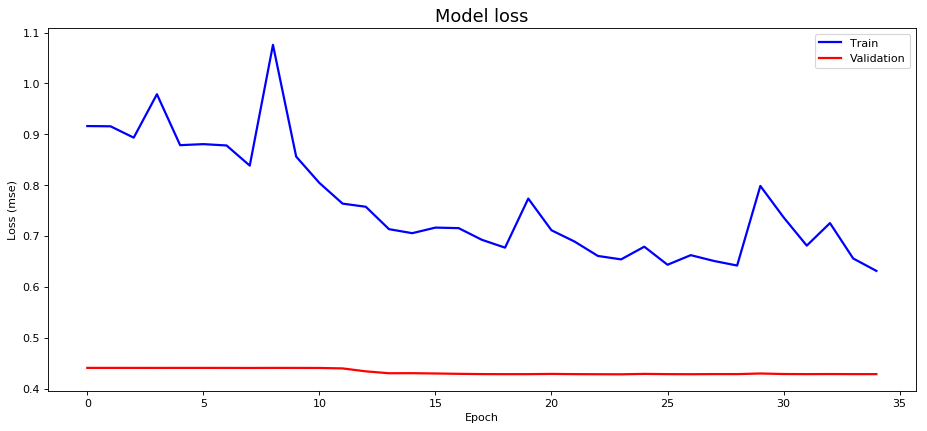

In [18]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mse)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

#### loss distribution

(0.0, 20)

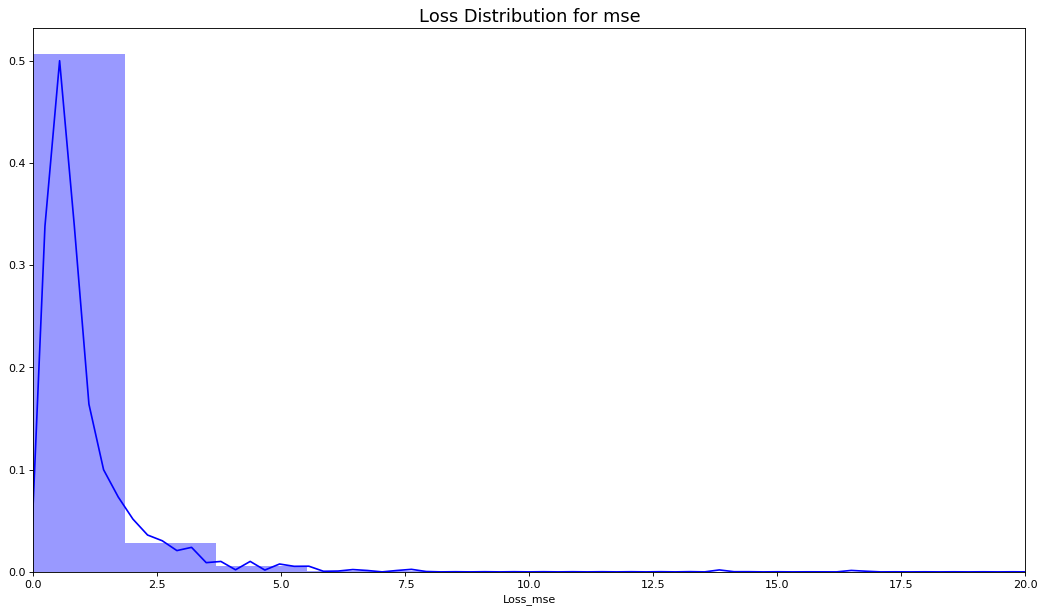

In [19]:
# plot the loss distribution of the training set
X_pred = model.predict(tr)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=a.columns)
X_pred.index = aa.index

scored = pd.DataFrame(index=a.index)
Xtrain = tr.reshape(tr.shape[0], tr.shape[2])
scored['Loss_mse'] = np.mean(np.square(X_pred-Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution for mse', fontsize=16)
sns.distplot(scored['Loss_mse'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,20])

In [24]:
X_train_pred = model.predict(tr)

train_mae_loss = np.mean(np.abs(X_train_pred - tr), axis=1)
train_mse_loss = np.mean(np.square(X_train_pred - tr), axis=1)



In [25]:
#train_mae_loss, train_mse_loss

In [20]:
X_pred = model.predict(te)

test_mae_loss = np.mean(np.abs(X_pred - te), axis=1)
test_mse_loss = np.mean(np.square(X_pred - te), axis=1)


In [21]:
test_mae_loss, test_mse_loss

(array([[0.13885194, 0.13218978, 0.08761492, ..., 0.07244495, 0.06698086,
         0.07011138],
        [0.6958096 , 0.43648715, 0.25422436, ..., 1.09460498, 2.18651278,
         2.27275399],
        [0.01291941, 0.10272436, 0.04529455, ..., 0.16021443, 0.08335774,
         0.08564784],
        ...,
        [0.0797117 , 0.11391027, 0.07464937, ..., 0.02310143, 0.02854682,
         0.03384061],
        [0.04201352, 0.02143412, 0.00581943, ..., 0.08008491, 0.12497878,
         0.1574005 ],
        [1.25990883, 0.45597748, 0.13650438, ..., 0.1398604 , 0.4923186 ,
         0.84990887]]),
 array([[1.92798620e-02, 1.74741389e-02, 7.67637352e-03, ...,
         5.24827071e-03, 4.48643527e-03, 4.91560526e-03],
        [4.84151003e-01, 1.90521031e-01, 6.46300228e-02, ...,
         1.19816007e+00, 4.78083815e+00, 5.16541071e+00],
        [1.66911131e-04, 1.05522939e-02, 2.05159600e-03, ...,
         2.56686642e-02, 6.94851198e-03, 7.33555329e-03],
        ...,
        [6.35395521e-03, 1.29755486e

#### setting threshold, and if exceeds counting as anamoly

In [42]:
MS = test_mse_loss > 10

In [43]:
MS

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [44]:
MS_answer = np.any(MS, axis=1)

In [45]:
sum(MS_answer)

282

In [46]:
labels = pd.read_csv("/Users/aj/docs/useful/sem3/MLDM project/data & codes/orhan/labels.csv", sep=",", index_col=0)

In [47]:
sample_number_list = [i for i in range(594)]   #sample number list
header = ['seqID', 'anomaly'] 
import csv

with open('will_upload_1.csv', 'w', newline='') as f:
    w = csv.writer(f, delimiter=';')
    w.writerow(header)
    for row in zip(sample_number_list, MS_answer):
        w.writerow(row)

In [48]:
myfile = pd.read_csv("will_upload_1.csv", sep=";", index_col=0)

In [49]:
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
for i in range(594):
    if labels.iloc[i][0] == myfile.iloc[i][0]:
        if labels.iloc[i][0] == 1:
            true_positive += 1
        else:
            true_negative += 1
    else:
        if labels.iloc[i][0] == 1:
            false_negative += 1
        else:
            false_positive += 1
print("Results: TP={0}, FP={1}, FN={2}, TN={3}".format(true_positive, false_positive, false_negative, true_negative))

Results: TP=255, FP=27, FN=42, TN=270


In [50]:
count1=0
count0 = 0
for i in range(594):
    if labels.iloc[i][0]==1:
        count1 = count1 + 1
    else:
        count0 = count0 +1
count1, count0

(297, 297)

#### F1 score

In [41]:
precision = round(true_positive/(true_positive + false_positive),5)
recall =  round(true_positive/(true_positive + false_negative),5)
F1 =  round(((recall*precision)/(recall + precision))*2,5)
print("Results: F1={0}, Precision={1}, Recall={2}".format(F1, precision, recall))

Results: F1=0.86195, Precision=0.86195, Recall=0.86195
